In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### **Harris Corner Detection** is an algorithm developed in 1988 for corner detection that works fairly well.


**Paper** - http://www.bmva.org/bmvc/1988/avc-88-023.pdf

**cv2.cornerHarris**(input image, block size, ksize, k)
- Input image - should be grayscale and float32 type.
- blockSize - the size of neighborhood considered for corner detection
- ksize - aperture parameter of Sobel derivative used.
- k - harris detector free parameter in the equation
- **Output** – array of corner locations (x,y)




In [16]:
# Load image then grayscale
def corner_detection(image):
    image = cv2.imread(f'images/{image}')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # The cornerHarris function requires the array datatype to be float32
    gray = np.float32(gray)

    harris_corners = cv2.cornerHarris(gray, 3, 3, 0.05)

    #We use dilation of the corner points to enlarge them\
    kernel = np.ones((7,7),np.uint8)
    harris_corners = cv2.dilate(harris_corners, kernel, iterations = 2)

    # Threshold for an optimal value, it may vary depending on the image.
    image[harris_corners > 0.025 * harris_corners.max() ] = [255, 127, 127]

    imshow('Harris Corners', image)

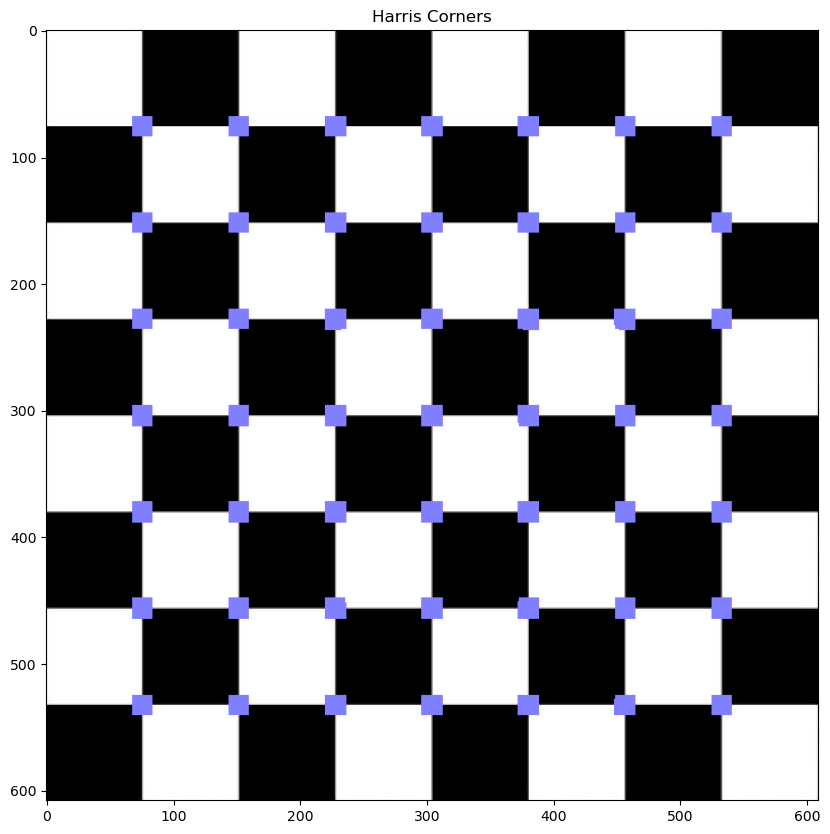

In [18]:
corner_detection('chess.JPG')

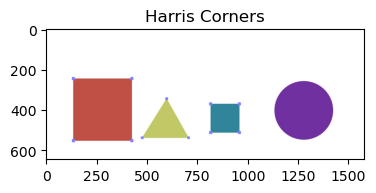

In [20]:
corner_detection('bunchofshapes.jpg')

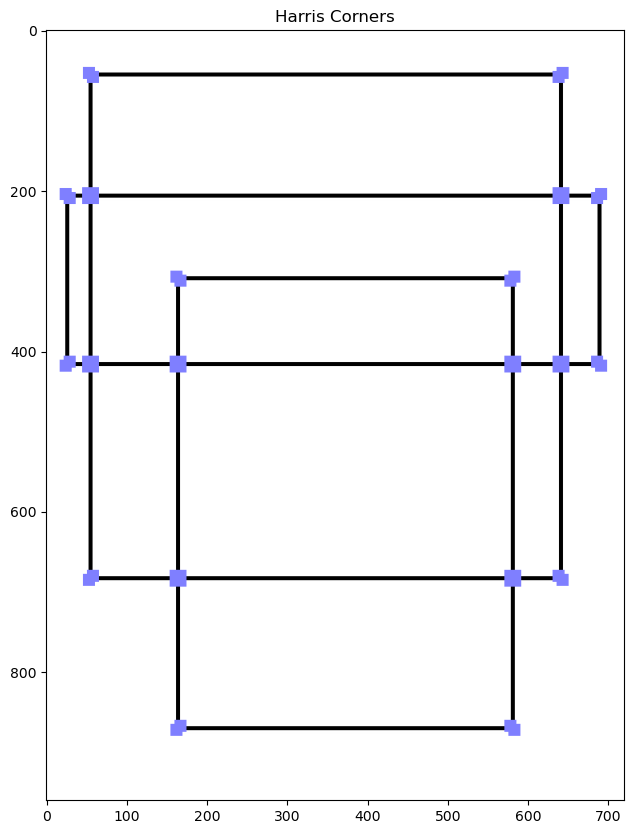

In [21]:
corner_detection('ex2.jpg')

libpng warning: bKGD: invalid


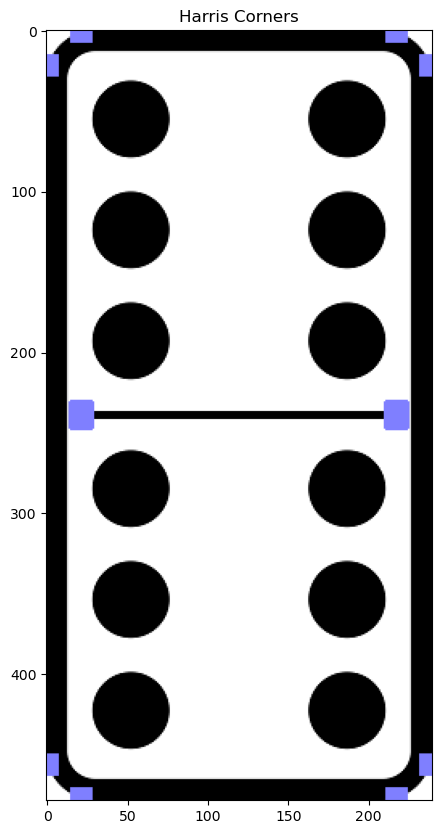

In [22]:
corner_detection('domino.png')

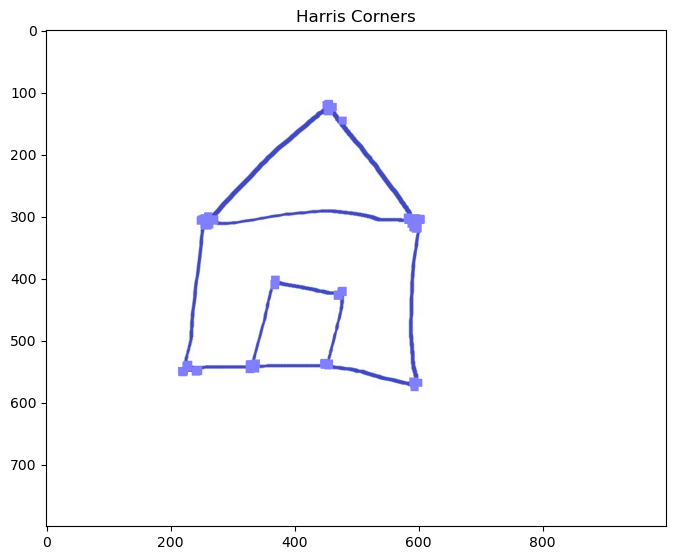

In [39]:
corner_detection('house.jpg')

**cv2.goodFeaturesToTrack**(input image, maxCorners, qualityLevel, minDistance)

- Input Image - 8-bit or floating-point 32-bit, single-channel image.
- maxCorners – Maximum number of corners to return. If there are more corners than are found, the strongest of them is returned.
- qualityLevel – Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure (smallest eigenvalue). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure = 1500, and the  qualityLevel=0.01 , then all the corners with the quality - - measure less than 15 are rejected.
- minDistance – Minimum possible Euclidean distance between the returned corners.


In [29]:
def corner_cv2_detection(image,max_num=100):
    img = cv2.imread(f'images/{image}')
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # We specific the top 50 corners
    corners = cv2.goodFeaturesToTrack(gray, max_num, 0.0005, 10)

    for corner in corners:
        x, y = corner[0]
        x = int(x)
        y = int(y)
        cv2.rectangle(img,(x-10,y-10),(x+10,y+10),(0,255,0), 2)
        
    imshow("Corners Found", img)

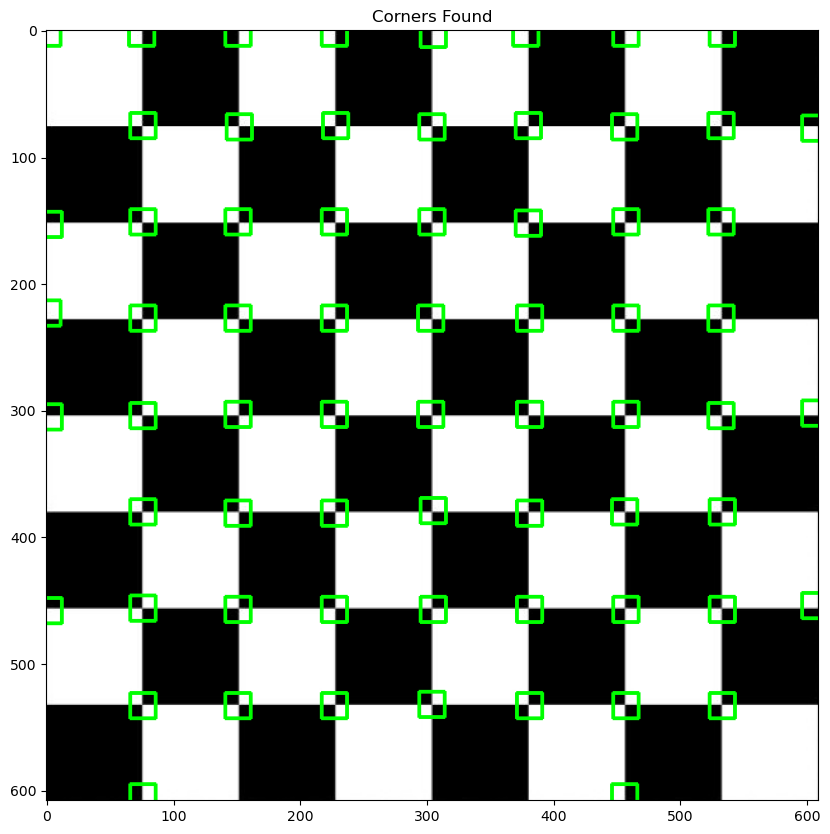

In [30]:
corner_cv2_detection('chess.JPG')

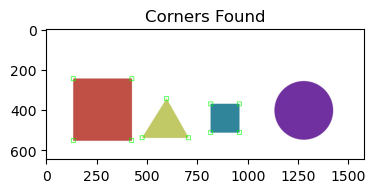

In [31]:
corner_cv2_detection('bunchofshapes.jpg',11)

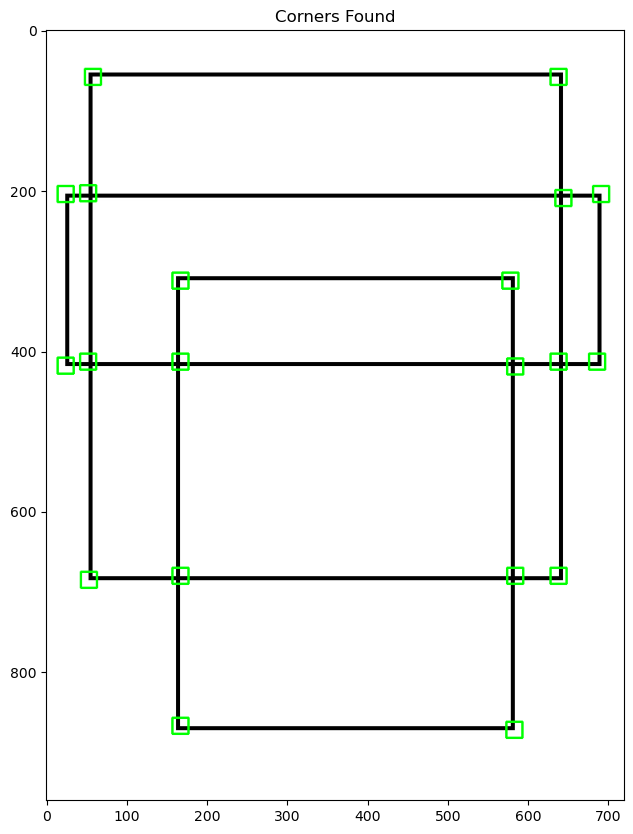

In [32]:
corner_cv2_detection('ex2.jpg',100)

libpng warning: bKGD: invalid


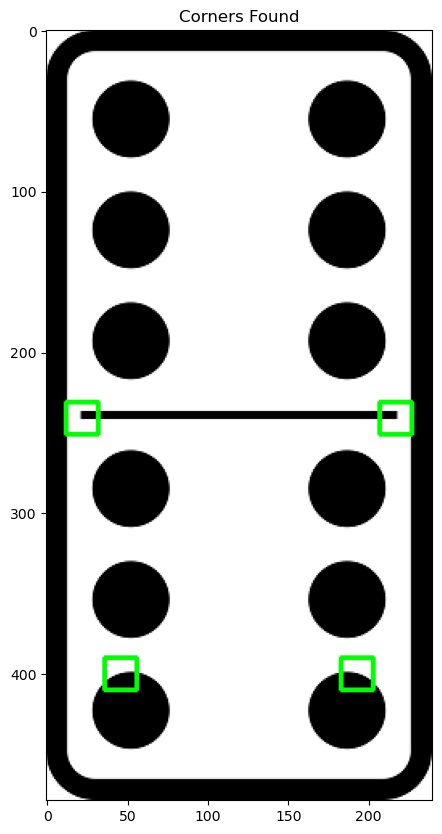

In [36]:
corner_cv2_detection('domino.png',4)

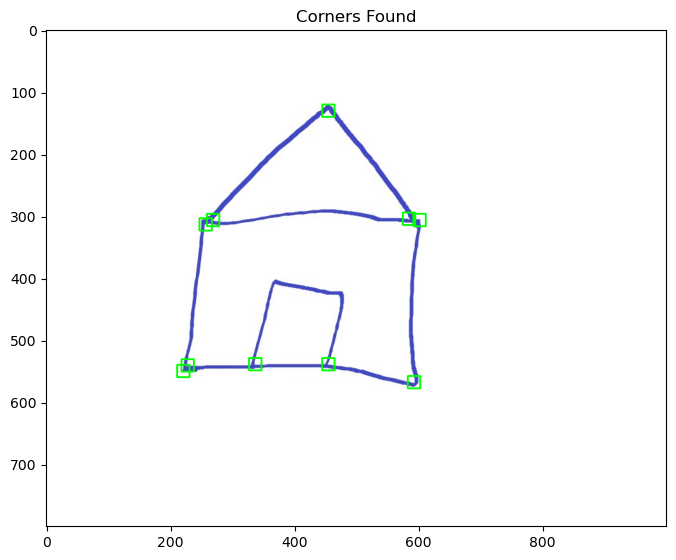

In [38]:
corner_cv2_detection('house.jpg',10)